In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

X.shape: (26, 2)


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


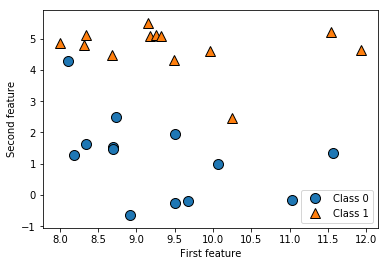

In [2]:
X, y = mglearn.datasets.make_forge()
# This code will grab a column from each data array in X and then plot that with y
mglearn.discrete_scatter(X[:, 0], X[:,1], y) 
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

In [3]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
# import and instantiate the class (algorithm)
# set the parameters: THE NUMBER OF NEIGHBORS TO USE
from sklearn.neighbors import KNeighborsClassifier
# prepare the model with the parameters we need
clf = KNeighborsClassifier(n_neighbors=3)

In [5]:
# Store the dataset so we can compute the neighbors during prediction
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
# To make predictions on the test data, we call the predict method
# for each data point in the test set, this computes its nearest neighbors in the 
# Training set and finds the most common class among then
# each item in the list is a data point and its class assignment
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [7]:
# To evaluate how well our model generalizes, we call the score method
# with the test data together with the test labels
# This value is the accuracy of our model, and it predicted the right class 86%
# of the samples in this test dataset
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


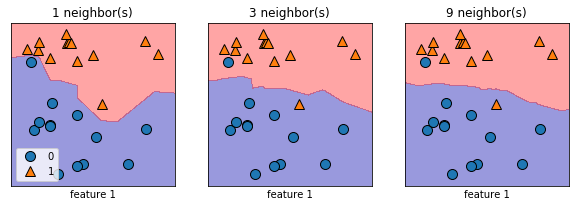

In [8]:
# decision boundary plot
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
#  the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_xlabel("feature 1")
axes[0].legend(loc=3)

In [9]:
# AS n_neighbors INCREASES SO DOES THE SMOOTHNESS OF THE DECISION BOUNDARY
# THIS MEANS WE HAVE A SIMPLER MODEL
# AS n_neighbors = NUMBER OF DATA POINTS, THEN EVERY POINT WILL BE ITS OWN NEIGHBOR AND 
# THEN ALL PREDICTIONS WOULD BE THE SAME 
# A CLASS IS DEFINED BY WHATS THE MOST FREQUEN IN DATA SET

In [10]:
# USING BINARY CLASSIFICATION BREAST CANCER DATASET
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

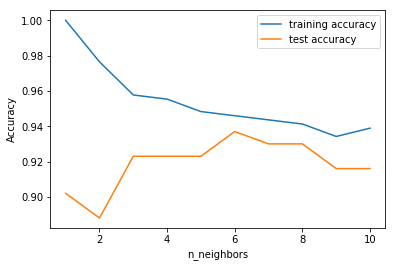

In [11]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
#     build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
#     record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
#     record generalizationa accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [12]:
# Training set: as neighbors increase, the model becomes more simplied, and the accuracy drops
# conversely, test accuracy increases as the number of neighbors increases, and the model is more generalized
# and simplified

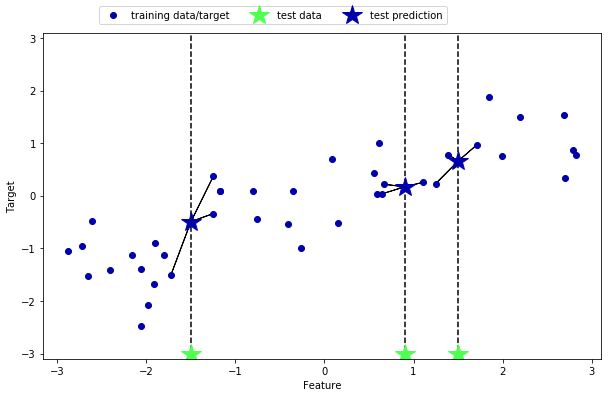

In [13]:
# K-neighbors regression
# Uses continuous data rather than binomial
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [14]:
# K-nearest neighbors algorithm for regression is implemented in the KNeighborsRegressor
# class in scikit-learn similar to KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [17]:
# make predictions on the test data
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [18]:
# Evalute the model using the score method, which for regressors returns the R^2 score
# coefficient of determination, which is a measure of the goodness of a prediction
# for a regressor model, and yields a score between 0 and 1
# A value of 1 corresponds to a perfect prediction

In [19]:
print("Test set R^2:{:.2f}".format(reg.score(X_test, y_test)))

Test set R^2:0.83


In [20]:
# Ordinary least squares linear regression model
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [21]:
print("Training set R^2:{:.2f}".format(lr.score(X_train, y_train)))

Training set R^2:0.95


In [22]:
print("Test set R^2:{:.2f}".format(lr.score(X_test, y_test)))

Test set R^2:0.61


In [23]:
# The difference between the training and test is a clear sign of overfitting
# BUT SIMPLE LINEAR REGRESSION OLS DOES NOT ALLOW FOR CONTROL OF ITS COMPLEXITY

In [24]:
# RIDGE REGRESSION ALLOWS US TO CONROL COMPLEXITY
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

In [25]:
print("Training set R^2:{:.2f}".format(ridge.score(X_train, y_train)))

Training set R^2:0.89


In [26]:
print("Test set R^2:{:.2f}".format(ridge.score(X_test, y_test)))

Test set R^2:0.75


In [27]:
# The training Ridge R^2 < The training OLS R^2
# because Ridge does not overfit like OLS
# A less complex model means worse performance on the training set but better at generalizing
# to new data (test data)

In [28]:
# modify alpha integer
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set R^2:{:.2f}".format(ridge10.score(X_train, y_train)))

Training set R^2:0.79


In [29]:
print("Test set R^2:{:.2f}".format(ridge10.score(X_test, y_test)))

Test set R^2:0.64


In [30]:
# modify alpha decimal
ridge01 = Ridge(alpha=.1).fit(X_train, y_train)
print("Training set R^2:{:.2f}".format(ridge01.score(X_train, y_train)))

Training set R^2:0.93


In [31]:
print("Test set R^2:{:.2f}".format(ridge01.score(X_test, y_test)))

Test set R^2:0.77


In [32]:
# Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

In [33]:
print("Training set R^2:{:.2f}".format(lasso.score(X_train, y_train)))

Training set R^2:0.29


In [34]:
print("Test set R^2:{:.2f}".format(lasso.score(X_test, y_test)))

Test set R^2:0.21


In [35]:
print("Number of features used: {}".format(np.sum(lasso.coef_ !=0)))

Number of features used: 4


In [36]:
# lasso does bad because it only used 4 of the total number of features
# lasso has alpha paramaters that help is control how strongly 
# coefficients are pushed to zero

In [37]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

In [38]:
print("Training set R^2:{:.2f}".format(lasso001.score(X_train, y_train)))

Training set R^2:0.90


In [39]:
print("Test set R^2:{:.2f}".format(lasso001.score(X_test, y_test)))

Test set R^2:0.77


In [40]:
print("Number of features used: {}".format(np.sum(lasso001.coef_ !=0)))

Number of features used: 33


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


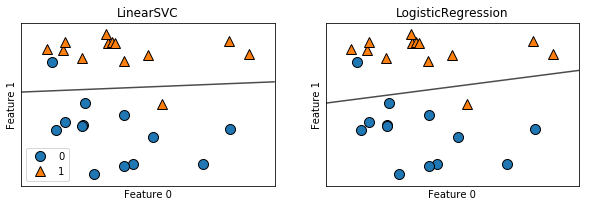

In [42]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize = (10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [43]:
# With parameter C = 1
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg=LogisticRegression().fit(X_train, y_train)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
print("Training set score:{:.3f}".format(logreg.score(X_train, y_train)))

Training set score:0.955


In [45]:
print("Test set score:{:.3f}".format(logreg.score(X_test, y_test)))

Test set score:0.958


In [46]:
# Paramter C=100
logreg100=LogisticRegression(C=100).fit(X_train, y_train)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
print("Training set score:{:.3f}".format(logreg100.score(X_train, y_train)))

Training set score:0.972


In [48]:
print("Test set score:{:.3f}".format(logreg100.score(X_test, y_test)))

Test set score:0.965


In [49]:
from sklearn.datasets import make_blobs

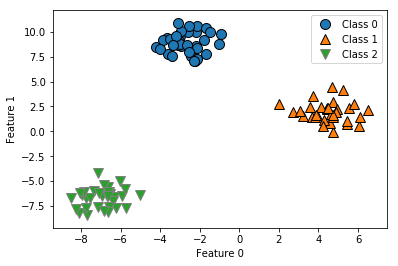

In [50]:
X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [51]:
# Train a linearSVC classifer to the dataset
linear_svm = LinearSVC().fit(X,y)

In [52]:
print("Coefficient shape: ", linear_svm.coef_.shape)

Coefficient shape:  (3, 2)


In [53]:
print("Intercept shape: ", linear_svm.intercept_.shape)

Intercept shape:  (3,)


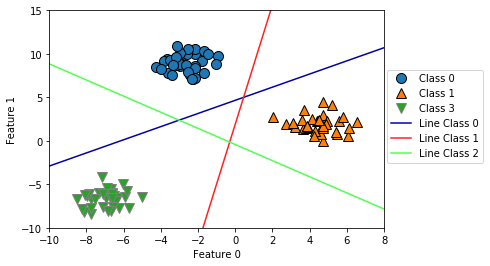

In [54]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)

plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 3", "Line Class 0", "Line Class 1", "Line Class 2"], loc=(1.01,0.3))

Text(0, 0.5, 'Feature 1')

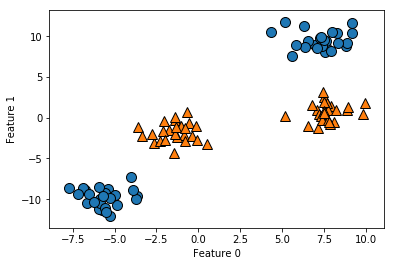

In [55]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')



/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

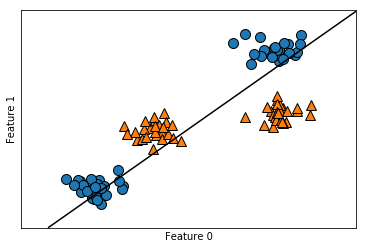

In [56]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0.5, 0, 'feature1 ** 2')

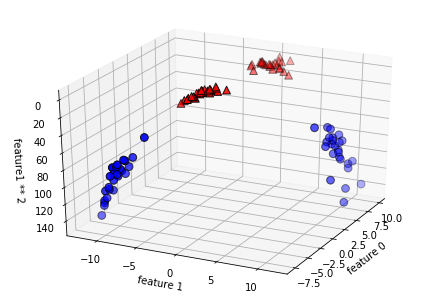

In [57]:
X_new = np.hstack([X, X[:,1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', cmap = mglearn.cm2, s=60, edgecolor = 'k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c = 'r', marker='^', cmap=mglearn.cm2, s= 60, edgecolor = 'k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

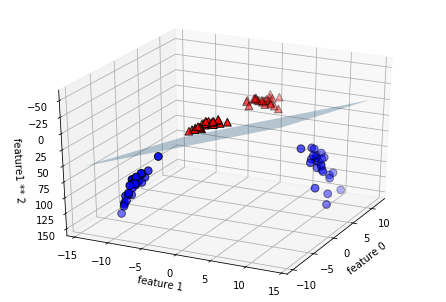

In [58]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', cmap = mglearn.cm2, s=60, edgecolor = 'k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c = 'r', marker='^', cmap=mglearn.cm2, s= 60, edgecolor = 'k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")

Text(0.5, 0, 'Feature 1')

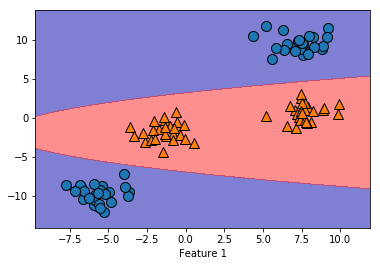

In [59]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

Text(0, 0.5, 'Feature 1')

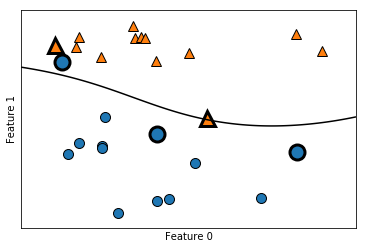

In [60]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

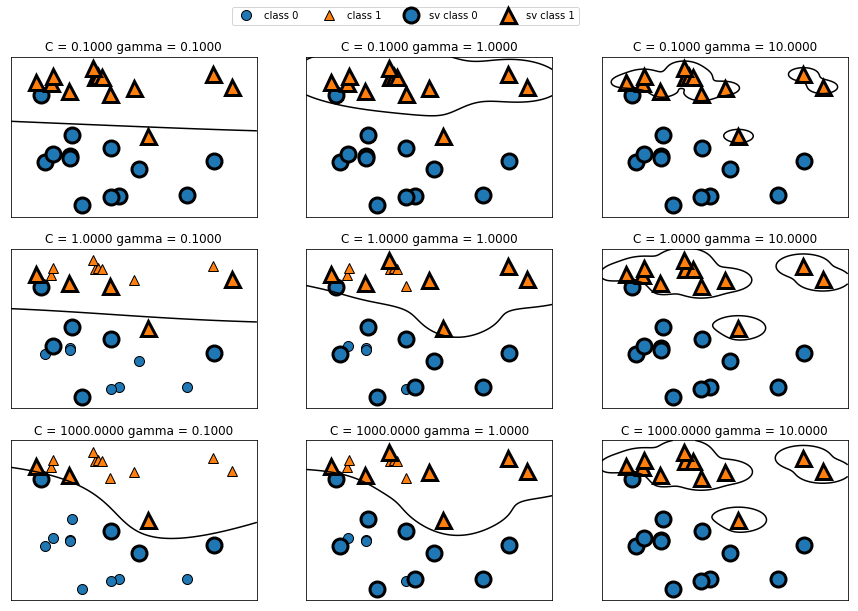

In [61]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

# from left to righ, the value of the gamma is increased from 0.1 to 10
# small gamma means a large radius for the guassian kerne
# this means many points are considered close by and means a smooth decision boundary
# also means that the decision boundary will vary slowly, and yields low model complexity
# a high gamma yields a more complex model
# Default gamma = 1/n_features

# a small C means a very restricted model
# each data point can only have a limited influence, which means more linear
# misclassification have a very limited influence on the line
# increasing C allows these points to have a stronger influence on the model
# makes the decision boundary bend to correctly classify them.
# Default C =1

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, 'Feature magnitude')

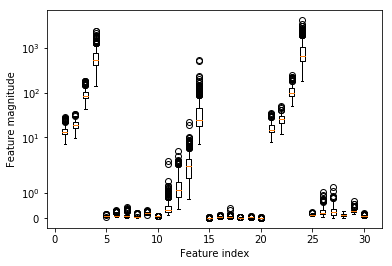

In [63]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [64]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [65]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [66]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [67]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [68]:
from sklearn.preprocessing import MinMaxScaler

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)